# User analysis based on music preferences #
### Import libraries, setup environment ###

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 150)
path='C:\\usersCode\\MScDataScience\\Multimodal analysis\\Preprocessing\\'

#### Read input user data ####

In [2]:
df = pd.read_excel(path+'spotify_metadata_playlist_clu.xlsx')
df.tail()

,row_id,acousticness,activity,age,artist_name,danceability,energy,gender,id,instrumentalness,liveness,location,loudness,mood,period,popularity,release_date,song_name,speechiness,tempo,user_id,valence,age_group,clusters_kmeans,clusters_kmodes,clusters_hdbscan,clusters_dbscan
698,698,0.09830,commuting,40,Deep Purple,0.632,0.586,male,5SAUIWdZ04OxYfJFDchC7S,0.581000,0.0535,outdoor,-11.333,excitement,midday,63,1972-03-25,Smoke on the Water,0.0284,114.243,9,0.890,41-50,7,0,0,-1
699,699,0.07900,commuting,40,The Clash,0.742,0.833,male,39shmbIHICJ2Wxnk1fPSdz,0.000000,0.3840,outdoor,-6.463,excitement,midday,77,1982,Should I Stay or Should I Go - Remastered,0.1150,113.375,9,0.816,41-50,7,0,0,-1
700,700,0.00705,commuting,40,Motörhead,0.448,0.936,male,1s0koYJ8UkZstIYYGboZa3,0.245000,0.1280,outdoor,-6.300,excitement,midday,29,1992-07-28,You Better Run,0.0589,135.135,9,0.536,41-50,7,0,0,-1
701,701,0.00377,commuting,40,Motörhead,0.660,0.778,male,7BwYSuWTyfcG3vtp1SnP7n,0.000856,0.3730,outdoor,-6.163,excitement,midday,44,1979-03-24,Louie Louie,0.0583,123.205,9,0.758,41-50,7,0,0,-1
702,702,0.00014,commuting,40,The Gone Jackals,0.305,0.882,male,2u2hIyLXxO06AudM88TmgF,0.249000,0.3880,outdoor,-13.521,excitement,midday,31,1995,Legacy,0.0706,125.519,9,0.477,41-50,7,0,0,-1


Profiling User 1
Number of items: 30
Cluster characteristics of user:1 
Clusters: 5 
Mood:contentment 
Location:home 
Activity:working 
When:evening
Spotify characteristics: Accousticness:[0.000841,0.755] 
Danceability:[0.351,0.805] 
Energy:[0.337,0.902] 
Loudness:[-13.692,-3.017] 
Tempo:[67.026,188.021] 
Valence:[0.0822,0.909] 
Instrumentalness:[0.0,0.874]


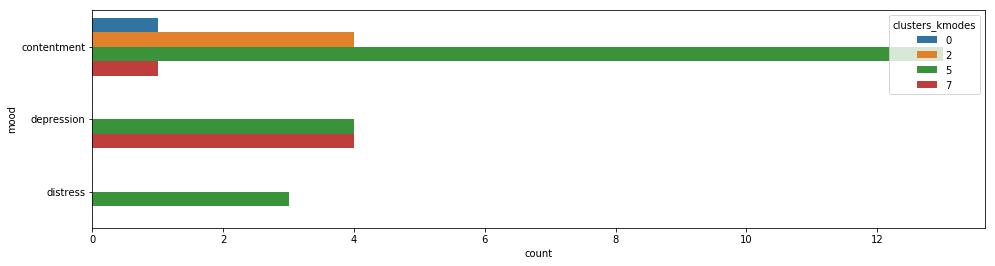

Profiling User 2
Number of items: 6
Cluster characteristics of user:2 
Clusters: 7 
Mood:contentment 
Location:home 
Activity:studying 
When:evening
Spotify characteristics: Accousticness:[0.00109,0.995] 
Danceability:[0.137,0.84] 
Energy:[0.0272,0.844] 
Loudness:[-29.648,-4.352] 
Tempo:[65.568,170.358] 
Valence:[0.0368,0.37] 
Instrumentalness:[0.000684,0.939]


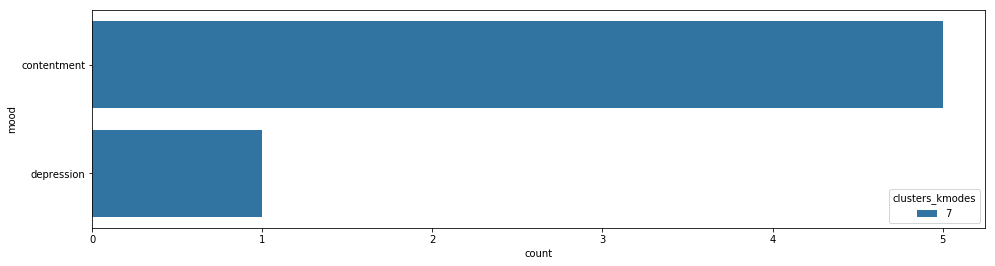

Profiling User 3
Number of items: 2
Cluster characteristics of user:3 
Clusters: 9 
Mood:excitement 
Location:home 
Activity:working out 
When:evening
Spotify characteristics: Accousticness:[0.0622,0.778] 
Danceability:[0.606,0.776] 
Energy:[0.294,0.78] 
Loudness:[-11.836,-4.374] 
Tempo:[76.083,124.949] 
Valence:[0.192,0.666] 
Instrumentalness:[0.0,0.162]


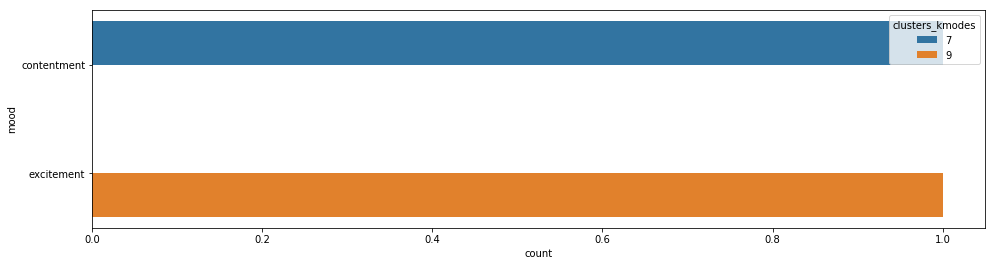

Profiling User 4
Number of items: 1
Cluster characteristics of user:4 
Clusters: 4 
Mood:excitement 
Location:work 
Activity:working 
When:afternoon
Spotify characteristics: Accousticness:[0.00678,0.00678] 
Danceability:[0.853,0.853] 
Energy:[0.541,0.541] 
Loudness:[-10.229,-10.229] 
Tempo:[124.001,124.001] 
Valence:[0.62,0.62] 
Instrumentalness:[0.000224,0.000224]


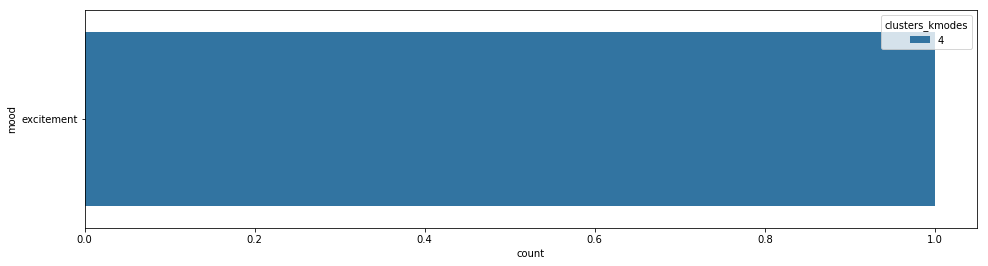

Profiling User 5
Number of items: 67
Cluster characteristics of user:5 
Clusters: 1 
Mood:contentment 
Location:home 
Activity:amusing 
When:night
Spotify characteristics: Accousticness:[0.00286,0.94] 
Danceability:[0.275,0.855] 
Energy:[0.0959,0.968] 
Loudness:[-20.338,-3.112] 
Tempo:[75.836,189.785] 
Valence:[0.136,0.963] 
Instrumentalness:[0.0,0.865]


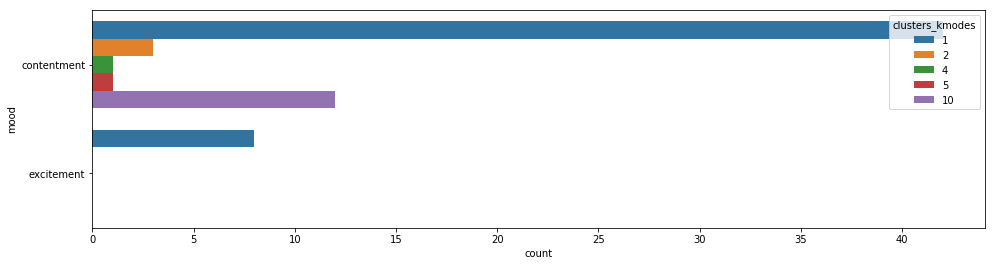

Profiling User 6
Number of items: 80
Cluster characteristics of user:6 
Clusters: 6 
Mood:contentment 
Location:work 
Activity:working 
When:midday
Spotify characteristics: Accousticness:[1.15e-05,0.985] 
Danceability:[0.219,0.854] 
Energy:[0.00894,0.975] 
Loudness:[-25.102,-3.9] 
Tempo:[56.3,208.571] 
Valence:[0.0547,0.91] 
Instrumentalness:[0.0,0.942]


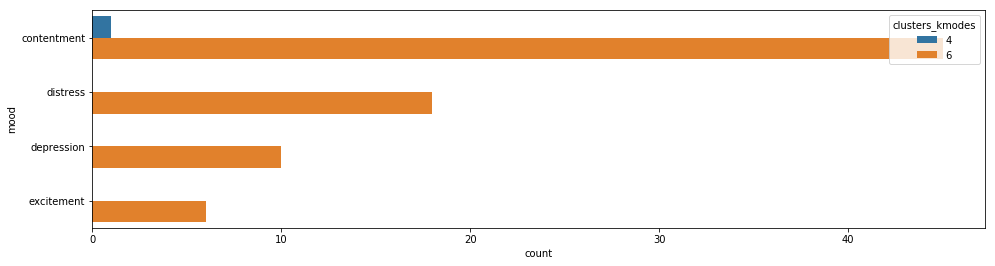

Profiling User 7
Number of items: 43
Cluster characteristics of user:7 
Clusters: 8 
Mood:contentment 
Location:other 
Activity:commuting 
When:midday
Spotify characteristics: Accousticness:[4.52e-05,0.963] 
Danceability:[0.307,0.952] 
Energy:[0.147,0.939] 
Loudness:[-18.097,-2.214] 
Tempo:[75.454,199.373] 
Valence:[0.0694,0.965] 
Instrumentalness:[0.0,0.942]


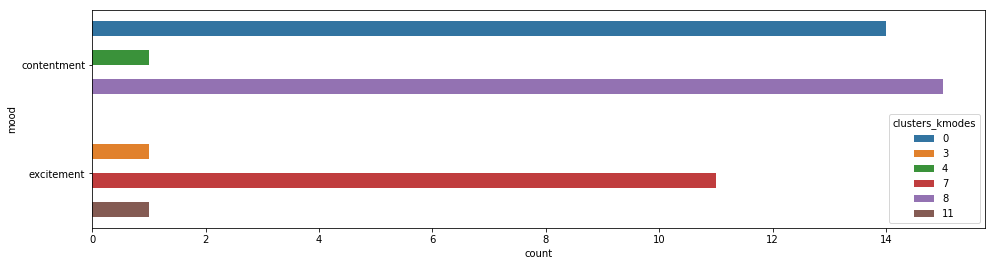

Profiling User 8
Number of items: 37
Cluster characteristics of user:8 
Clusters: 4 
Mood:contentment 
Location:work 
Activity:working 
When:morning
Spotify characteristics: Accousticness:[1.95e-05,0.995] 
Danceability:[0.112,0.837] 
Energy:[0.0559,0.962] 
Loudness:[-25.377,-2.597] 
Tempo:[72.81,197.705] 
Valence:[0.0348,0.952] 
Instrumentalness:[0.0,0.961]


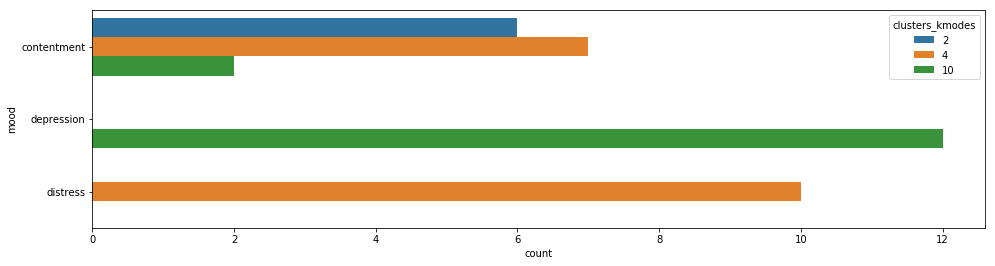

Profiling User 9
Number of items: 56
Cluster characteristics of user:9 
Clusters: 7 
Mood:contentment 
Location:home 
Activity:amusing 
When:morning
Spotify characteristics: Accousticness:[5.36e-06,0.938] 
Danceability:[0.112,0.794] 
Energy:[0.0686,0.983] 
Loudness:[-23.208,-2.752] 
Tempo:[77.865,200.024] 
Valence:[0.139,0.954] 
Instrumentalness:[0.0,0.962]


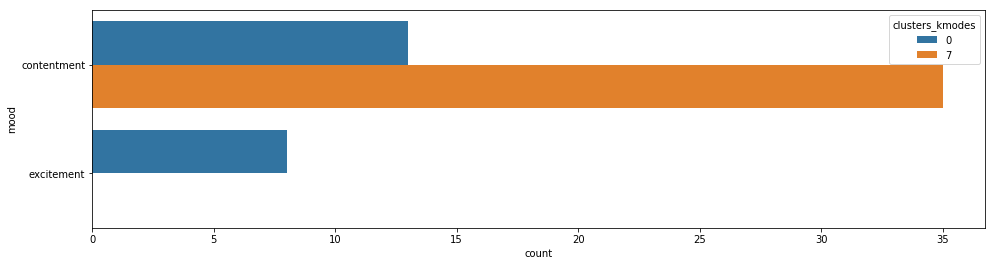

Profiling User 10
Number of items: 15
Cluster characteristics of user:10 
Clusters: 10 
Mood:contentment 
Location:home 
Activity:working 
When:morning
Spotify characteristics: Accousticness:[0.000453,0.963] 
Danceability:[0.346,0.798] 
Energy:[0.201,0.913] 
Loudness:[-13.156,-2.578] 
Tempo:[72.637,174.53] 
Valence:[0.102,0.89] 
Instrumentalness:[0.0,0.645]


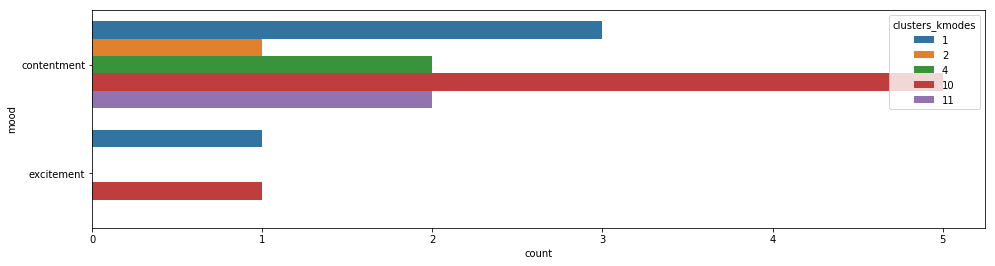

Profiling User 11
Number of items: 48
Cluster characteristics of user:11 
Clusters: 0 
Mood:excitement 
Location:outdoor 
Activity:working 
When:midday
Spotify characteristics: Accousticness:[2.77e-06,0.963] 
Danceability:[0.153,0.807] 
Energy:[0.0686,0.961] 
Loudness:[-23.208,-2.379] 
Tempo:[64.223,176.445] 
Valence:[0.163,0.952] 
Instrumentalness:[0.0,0.962]


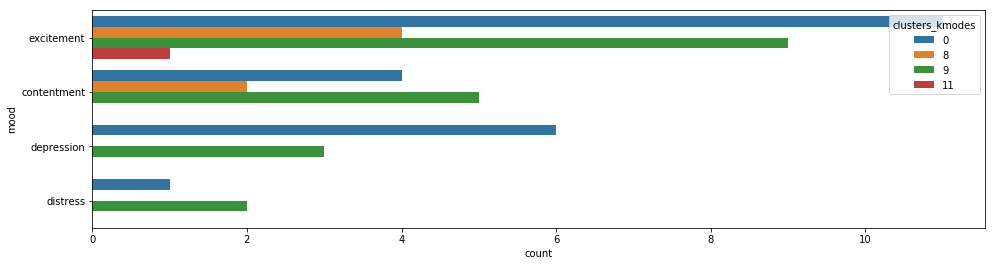

Profiling User 12
Number of items: 26
Cluster characteristics of user:12 
Clusters: 7 
Mood:contentment 
Location:home 
Activity:working 
When:afternoon
Spotify characteristics: Accousticness:[2.06e-05,0.741] 
Danceability:[0.336,0.856] 
Energy:[0.383,0.99] 
Loudness:[-14.193,-1.077] 
Tempo:[79.974,170.036] 
Valence:[0.0928,0.969] 
Instrumentalness:[0.0,0.891]


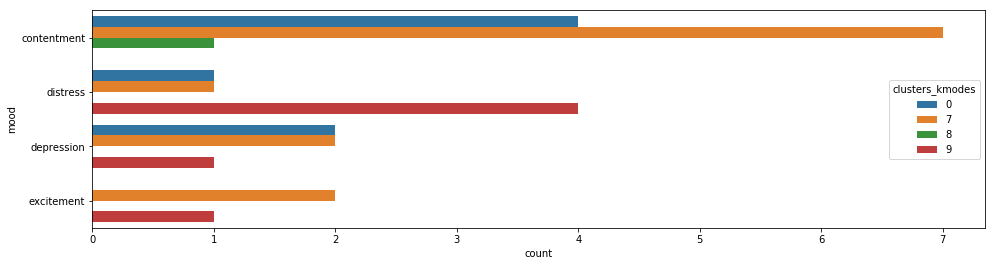

Profiling User 13
Number of items: 25
Cluster characteristics of user:13 
Clusters: 0 
Mood:excitement 
Location:work 
Activity:working 
When:morning
Spotify characteristics: Accousticness:[0.00671,0.925] 
Danceability:[0.252,0.933] 
Energy:[0.216,0.909] 
Loudness:[-13.551,-3.017] 
Tempo:[80.609,182.957] 
Valence:[0.166,0.876] 
Instrumentalness:[0.0,0.772]


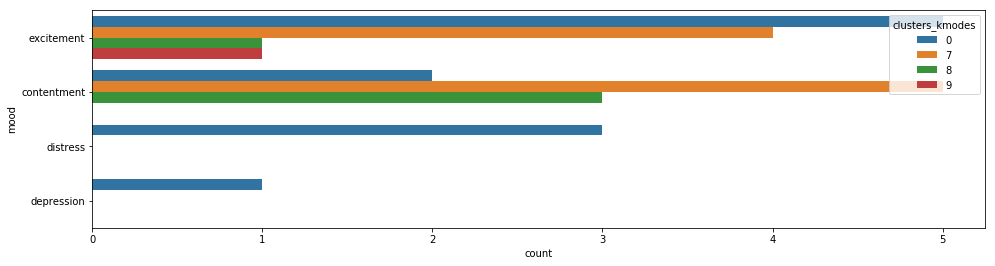

Profiling User 14
Number of items: 13
Cluster characteristics of user:14 
Clusters: 7 
Mood:excitement 
Location:home 
Activity:amusing 
When:night
Spotify characteristics: Accousticness:[0.181,0.692] 
Danceability:[0.53,0.843] 
Energy:[0.338,0.687] 
Loudness:[-10.691,-6.4] 
Tempo:[98.027,173.737] 
Valence:[0.111,0.803] 
Instrumentalness:[0.0,0.876]


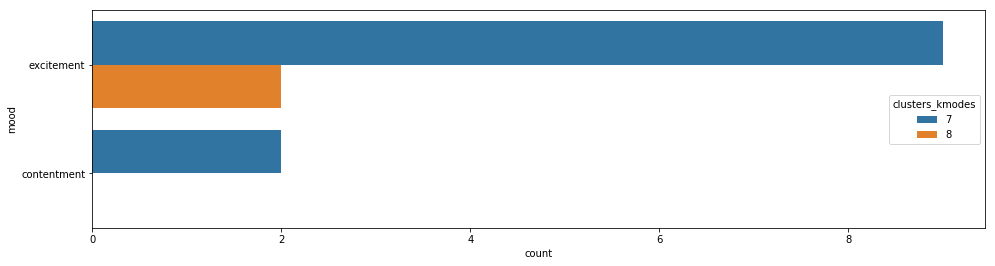

Profiling User 15
Number of items: 11
Cluster characteristics of user:15 
Clusters: 3 
Mood:depression 
Location:home 
Activity:amusing 
When:night
Spotify characteristics: Accousticness:[0.000976,0.956] 
Danceability:[0.147,0.825] 
Energy:[0.0954,0.871] 
Loudness:[-29.213,-2.959] 
Tempo:[73.418,155.007] 
Valence:[0.0269,0.836] 
Instrumentalness:[0.0,0.943]


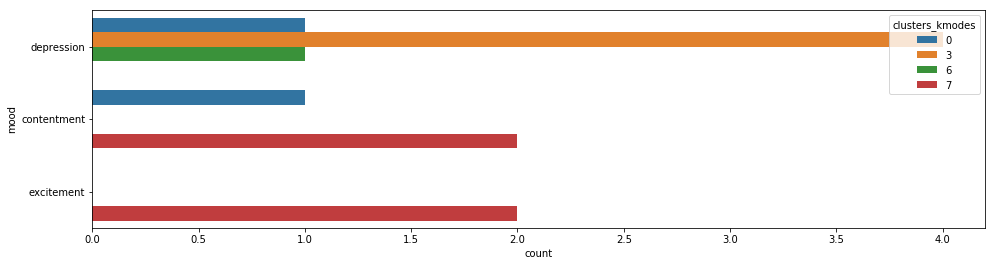

Profiling User 16
Number of items: 75
Cluster characteristics of user:16 
Clusters: 2 
Mood:contentment 
Location:home 
Activity:studying 
When:morning
Spotify characteristics: Accousticness:[4.52e-05,0.963] 
Danceability:[0.222,0.826] 
Energy:[0.201,0.967] 
Loudness:[-14.192,-2.578] 
Tempo:[72.637,193.948] 
Valence:[0.0948,0.923] 
Instrumentalness:[0.0,0.891]


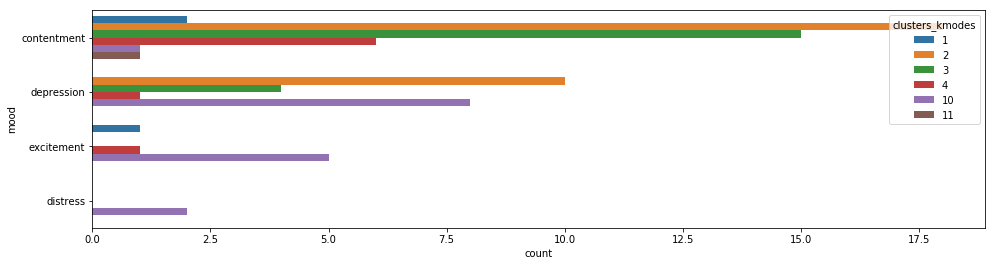

,row_id,acousticness,activity,age,artist_name,danceability,energy,gender,id,instrumentalness,liveness,location,loudness,mood,period,popularity,release_date,song_name,speechiness,tempo,user_id,valence,age_group,clusters_kmeans,clusters_kmodes,clusters_hdbscan,clusters_dbscan
count,75.000000,75.000000,75,75.0,75,75.000000,75.000000,75,75,75.000000,75.000000,75,75.000000,75,75,75.000000,75,75,75.000000,75.000000,75.0,75.000000,75,75.000000,75.000000,75.000000,75.000000
unique,NaN,NaN,3,NaN,40,NaN,NaN,1,57,NaN,NaN,3,NaN,4,4,NaN,44,57,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
top,NaN,NaN,studying,NaN,Imagine Dragons,NaN,NaN,female,5Hv1QAbRWrUSUHaT0CmnMS,NaN,NaN,home,NaN,contentment,morning,NaN,2017-06-23,Into the Night (feat. Chad Kroeger),NaN,NaN,NaN,NaN,31-40,NaN,NaN,NaN,NaN
freq,NaN,NaN,53,NaN,6,NaN,NaN,75,3,NaN,NaN,43,NaN,43,44,NaN,6,3,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN
mean,283.133333,0.178910,NaN,33.0,NaN,0.562053,0.697267,NaN,NaN,0.075417,0.182136,NaN,-7.393653,NaN,NaN,56.800000,NaN,NaN,0.059793,118.447960,16.0,0.512652,NaN,4.586667,4.253333,4.293333,3.666667
std,22.008802,0.227344,NaN,0.0,NaN,0.138969,0.170386,NaN,NaN,0.181475,0.141902,NaN,2.931605,NaN,NaN,19.282396,NaN,NaN,0.046163,26.541111,0.0,0.225009,NaN,2.661504,3.242844,3.931073,3.107677
min,246.000000,0.000045,NaN,33.0,NaN,0.222000,0.201000,NaN,NaN,0.000000,0.027200,NaN,-14.192000,NaN,NaN,0.000000,NaN,NaN,0.025400,72.637000,16.0,0.094800,NaN,3.000000,1.000000,-1.000000,-1.000000
25%,264.500000,0.005320,NaN,33.0,NaN,0.444000,0.631500,NaN,NaN,0.000000,0.091750,NaN,-9.839000,NaN,NaN,46.500000,NaN,NaN,0.031850,100.025500,16.0,0.338000,NaN,3.000000,2.000000,-1.000000,0.000000
50%,283.000000,0.080100,NaN,33.0,NaN,0.569000,0.704000,NaN,NaN,0.000734,0.127000,NaN,-7.283000,NaN,NaN,62.000000,NaN,NaN,0.044800,114.243000,16.0,0.466000,NaN,3.000000,3.000000,5.000000,6.000000
75%,301.500000,0.294000,NaN,33.0,NaN,0.671000,0.844500,NaN,NaN,0.018150,0.244000,NaN,-4.850500,NaN,NaN,70.000000,NaN,NaN,0.056400,137.863000,16.0,0.666000,NaN,6.500000,4.000000,6.000000,6.000000


In [6]:
n_users=17
cluster_method = 'clusters_kmodes'

for user in range(1,n_users):
    df_filtered = df[df['user_id'] == user]
    length = len(df_filtered)
    
    print('Profiling User {}'.format(user) )
    print('Number of items:', length)
    print('Cluster characteristics of user:{} \nClusters: {} \nMood:{} \nLocation:{} \nActivity:{} \nWhen:{}'.format(user, 
                                                                                        df_filtered[cluster_method].value_counts().sort_values(ascending=False).idxmax(),
                                                                                        df_filtered['mood'].value_counts().sort_values(ascending=False).idxmax(),
                                                                                        df_filtered['location'].value_counts().sort_values(ascending=False).idxmax(),
                                                                                        df_filtered['activity'].value_counts().sort_values(ascending=False).idxmax(),
                                                                                        df_filtered['period'].value_counts().sort_values(ascending=False).idxmax()
                                                                                                                    ))

    print('Spotify characteristics: Accousticness:[{}] \nDanceability:[{}] \nEnergy:[{}] \nLoudness:[{}] \nTempo:[{}] \nValence:[{}] \nInstrumentalness:[{}]'.format(
                                                                                        str(df_filtered['acousticness'].min())+','+str(df_filtered['acousticness'].max()), 
                                                                                        str(df_filtered['danceability'].min())+','+str(df_filtered['danceability'].max()), 
                                                                                        str(df_filtered['energy'].min())+','+str(df_filtered['energy'].max()), 
                                                                                        str(df_filtered['loudness'].min())+','+str(df_filtered['loudness'].max()),
                                                                                        str(df_filtered['tempo'].min())+','+str(df_filtered['tempo'].max()), 
                                                                                        str(df_filtered['valence'].min())+','+str(df_filtered['valence'].max()), 
                                                                                        str(df_filtered['instrumentalness'].min())+','+str(df_filtered['instrumentalness'].max())
                                                                                                                    ))

    
    plt.figure(figsize=(16,4))
    sns.countplot(y='mood', data=df_filtered, hue=cluster_method, order = df_filtered.mood.value_counts().index )
    plt.show()
    
df_filtered.describe(include='all')



#sns.pairplot(df_filtered)